In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\datasets\\breastcancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


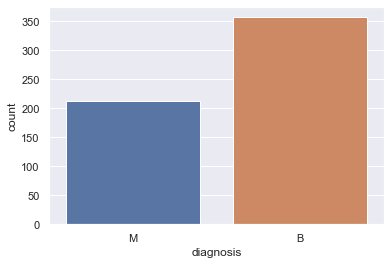

In [5]:
sns.countplot(df['diagnosis'])#to check whether the target variable data is imbalanced

As we can see that inputs are continuous variables and output is a categorical variable, so we can use ANOVA Test for feature selection

### Feature Selection( Filter Method) -  ANOVA Test

In [6]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
x = df.iloc[:,1:]
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 20, stratify= y)
fs = SelectKBest(score_func = f_classif, k=10).fit(x_train, y_train)
x_train_selected = fs.transform(x_train)
x_train_selected = pd.DataFrame(x_train_selected, columns=x_train.columns[fs.get_support()] )

In [7]:
fs.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [8]:
x_train_selected.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,12.34,79.85,464.5,0.053700,0.028220,13.580,87.36,553.0,0.16880,0.08194
1,23.09,152.10,1682.0,0.167600,0.100300,30.790,211.50,2782.0,0.37940,0.22640
2,13.64,87.38,575.3,0.047050,0.037310,14.850,94.11,683.4,0.15330,0.09222
3,9.00,56.36,246.3,0.003681,0.003472,9.699,60.90,285.5,0.01472,0.01389
4,13.28,85.79,541.8,0.050770,0.028640,14.240,96.59,623.7,0.28660,0.09173


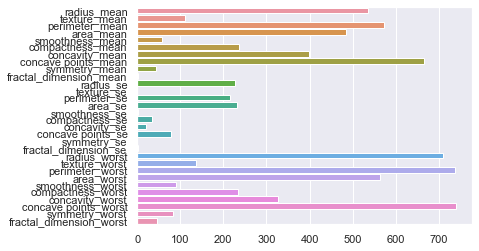

In [9]:
sns.barplot(x= fs.scores_, y = df.columns[1:])

In [10]:
x_test_selected = fs.fit_transform(x_test, y_test)
x_test_selected = pd.DataFrame(x_test_selected, columns =x_train.columns[fs.get_support()])

In [11]:
x_test_selected.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,13.66,89.46,575.3,0.09657,0.04812,15.14,101.40,708.8,0.36600,0.14070
1,13.00,82.61,520.2,0.01206,0.01762,14.34,91.06,628.5,0.04462,0.05921
2,17.19,111.60,928.3,0.09061,0.06527,21.58,140.50,1436.0,0.38890,0.19840
3,13.53,87.91,559.2,0.06877,0.06556,14.08,91.36,605.5,0.08539,0.07407
4,12.00,76.77,442.5,0.04055,0.01945,13.09,85.07,523.7,0.18110,0.07116


### New Dataset with important Features

In [12]:
wdf = df[x_train.columns[fs.get_support()]]

In [13]:
wdf = pd.concat([wdf, df['diagnosis']], axis =1)
wdf.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654,M
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860,M
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430,M
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575,M
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625,M


## Exploratory Data Analysis

In [14]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           569 non-null    float64
 1   perimeter_mean        569 non-null    float64
 2   area_mean             569 non-null    float64
 3   concavity_mean        569 non-null    float64
 4   concave points_mean   569 non-null    float64
 5   radius_worst          569 non-null    float64
 6   perimeter_worst       569 non-null    float64
 7   area_worst            569 non-null    float64
 8   concavity_worst       569 non-null    float64
 9   concave points_worst  569 non-null    float64
 10  diagnosis             569 non-null    object 
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [15]:
wdf.describe()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.088799,0.048919,16.269190,107.261213,880.583128,0.272188,0.114606
std,3.524049,24.298981,351.914129,0.079720,0.038803,4.833242,33.602542,569.356993,0.208624,0.065732
min,6.981000,43.790000,143.500000,0.000000,0.000000,7.930000,50.410000,185.200000,0.000000,0.000000
25%,11.700000,75.170000,420.300000,0.029560,0.020310,13.010000,84.110000,515.300000,0.114500,0.064930
50%,13.370000,86.240000,551.100000,0.061540,0.033500,14.970000,97.660000,686.500000,0.226700,0.099930
75%,15.780000,104.100000,782.700000,0.130700,0.074000,18.790000,125.400000,1084.000000,0.382900,0.161400
max,28.110000,188.500000,2501.000000,0.426800,0.201200,36.040000,251.200000,4254.000000,1.252000,0.291000


## Data Visualization

### Univariate Analysis:

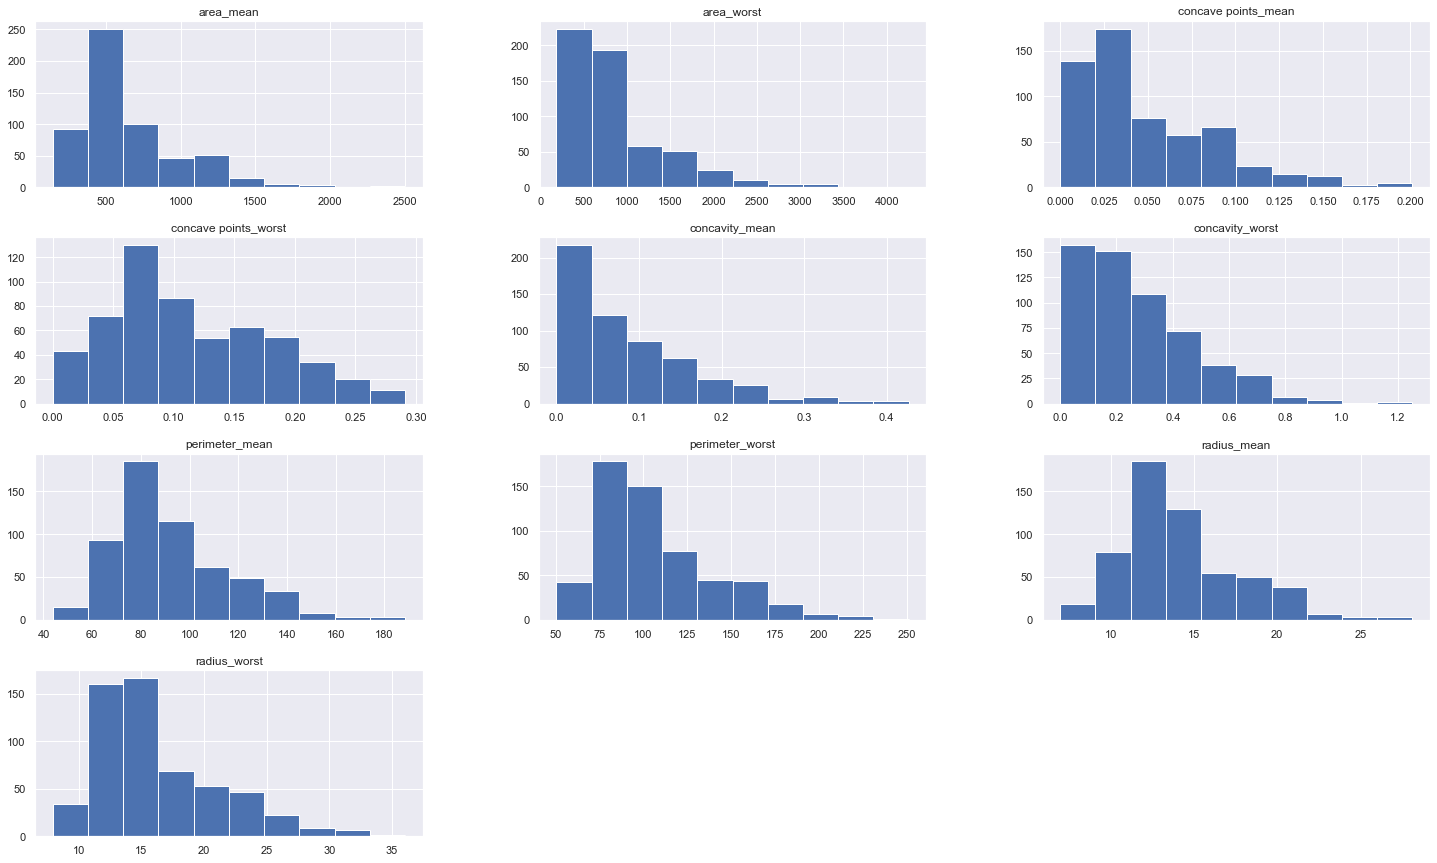

In [16]:
wdf.drop('diagnosis', axis =1).hist(figsize = (25,15))
plt.show()

Almost all the numerical variables are normally distributed 

### Bi-variate Analysis

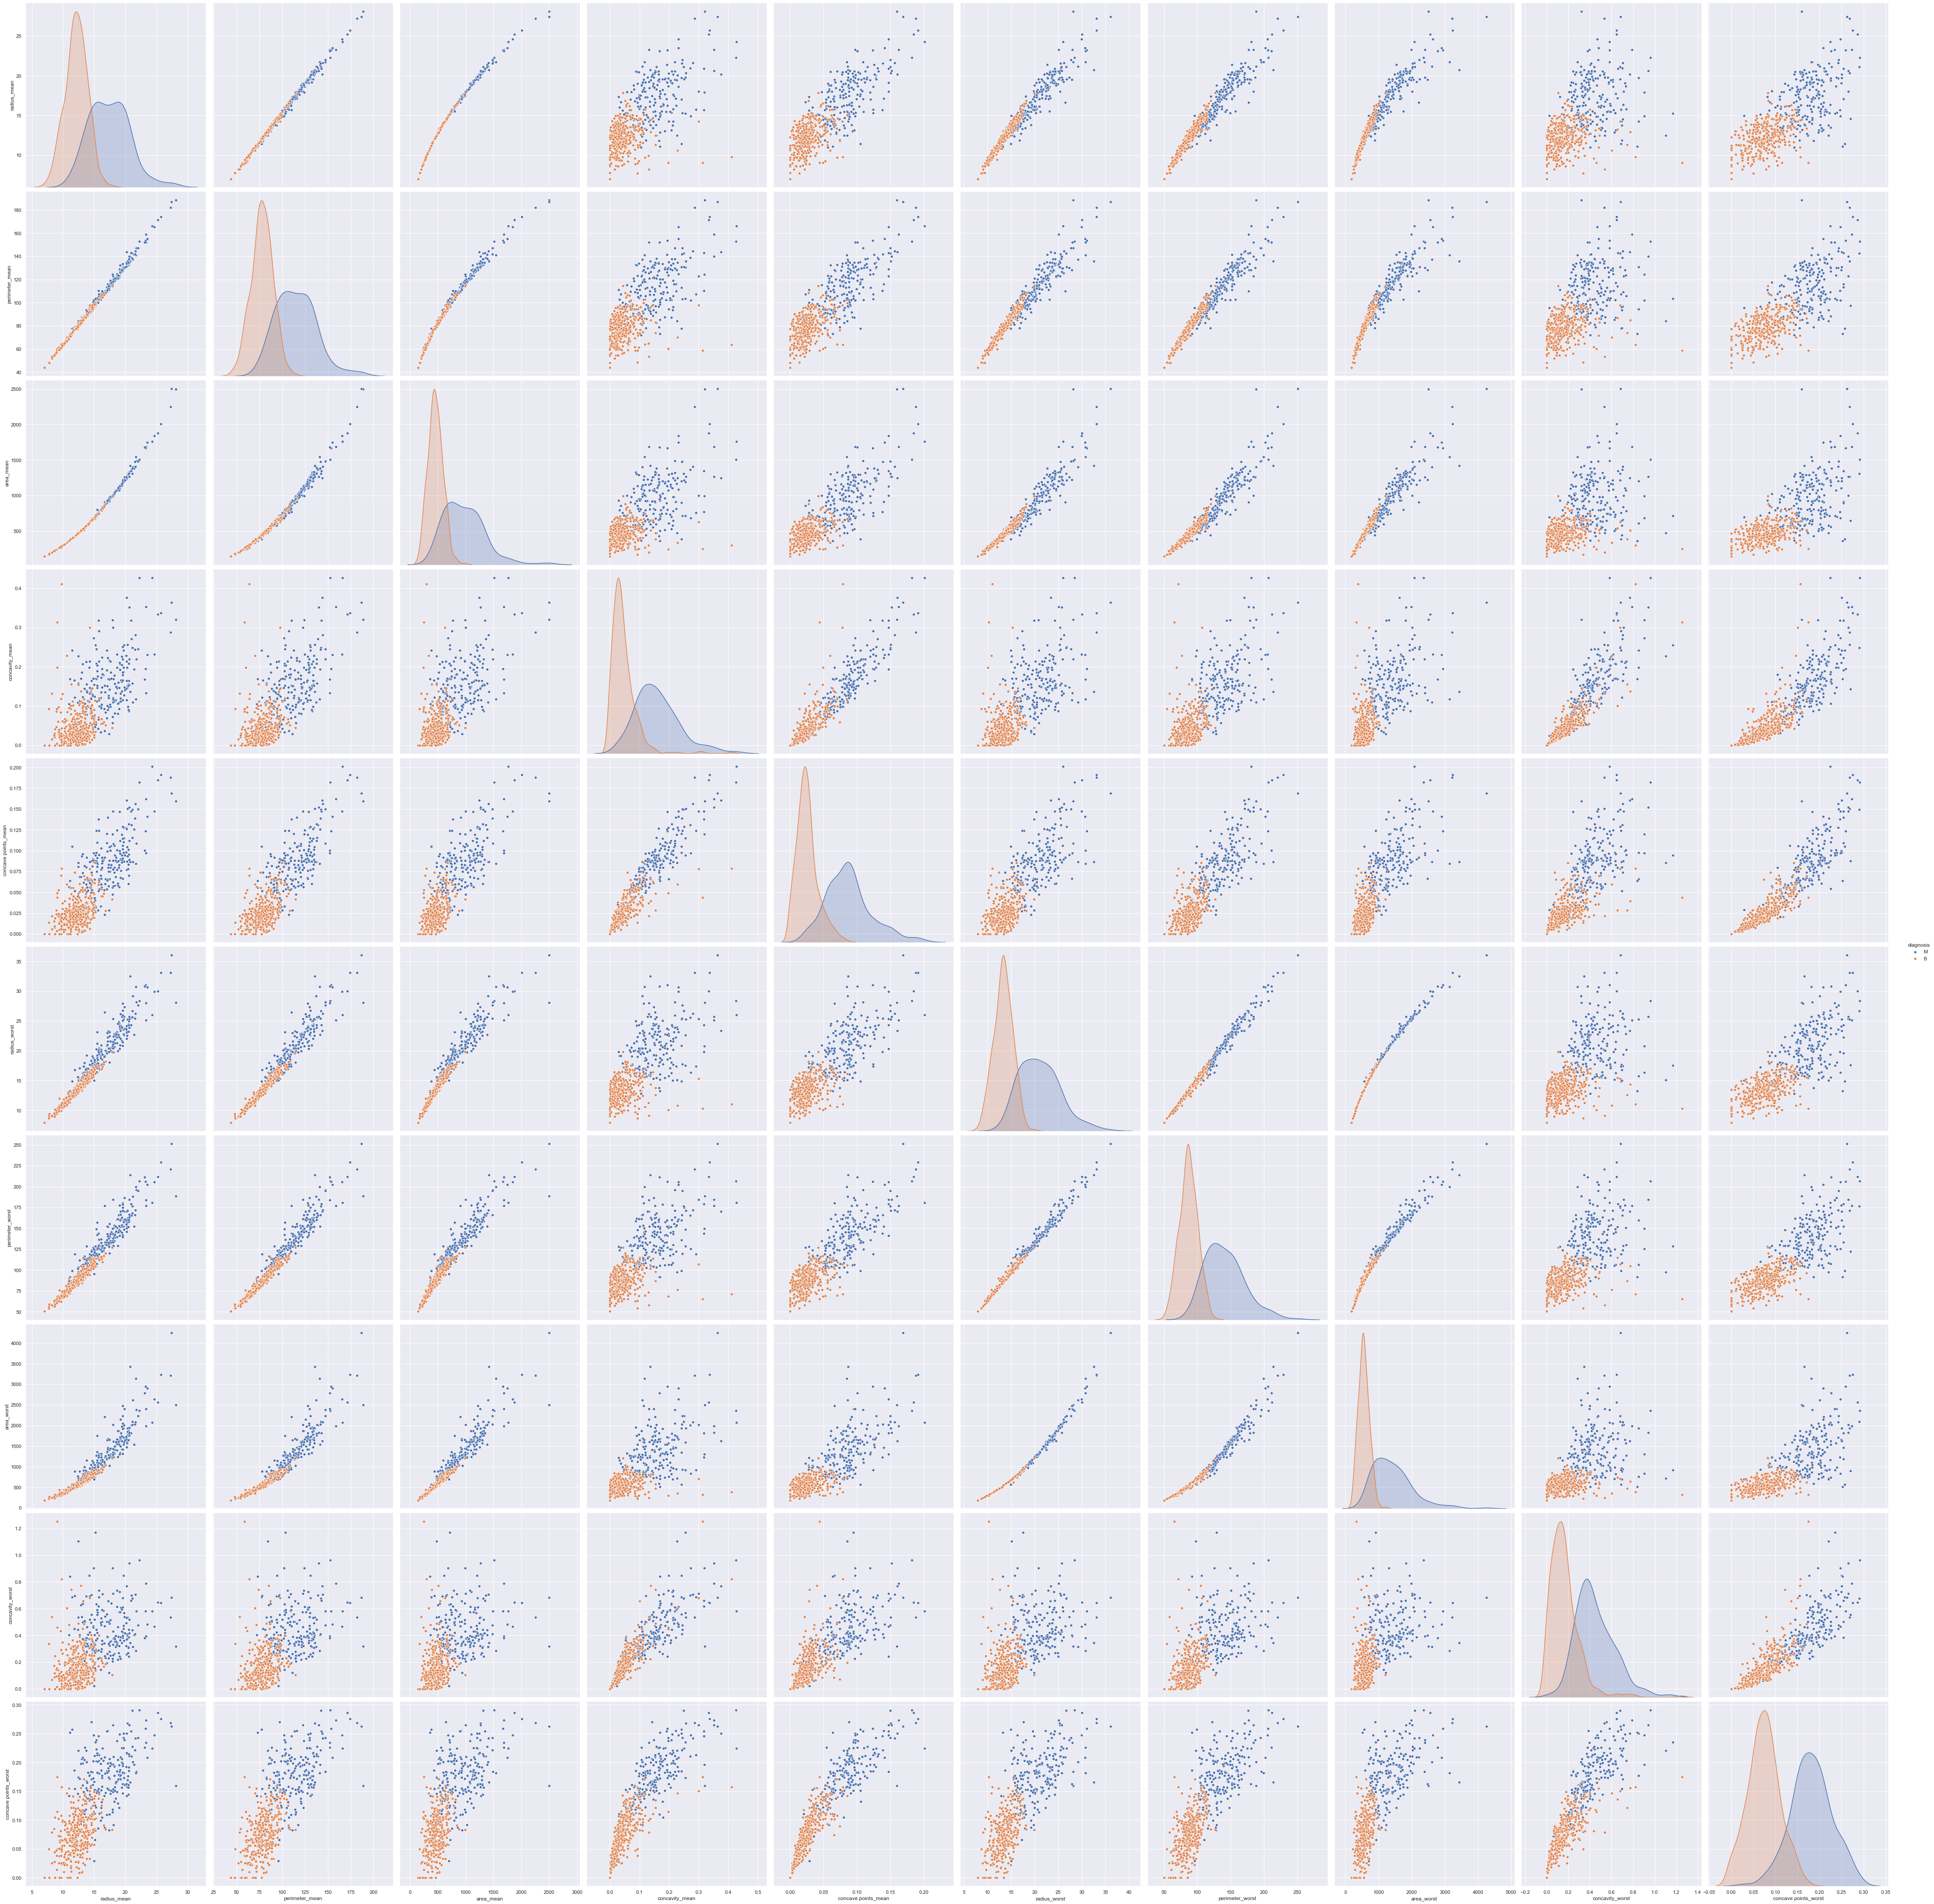

In [17]:
sns.pairplot(wdf, hue = 'diagnosis', height = 6)

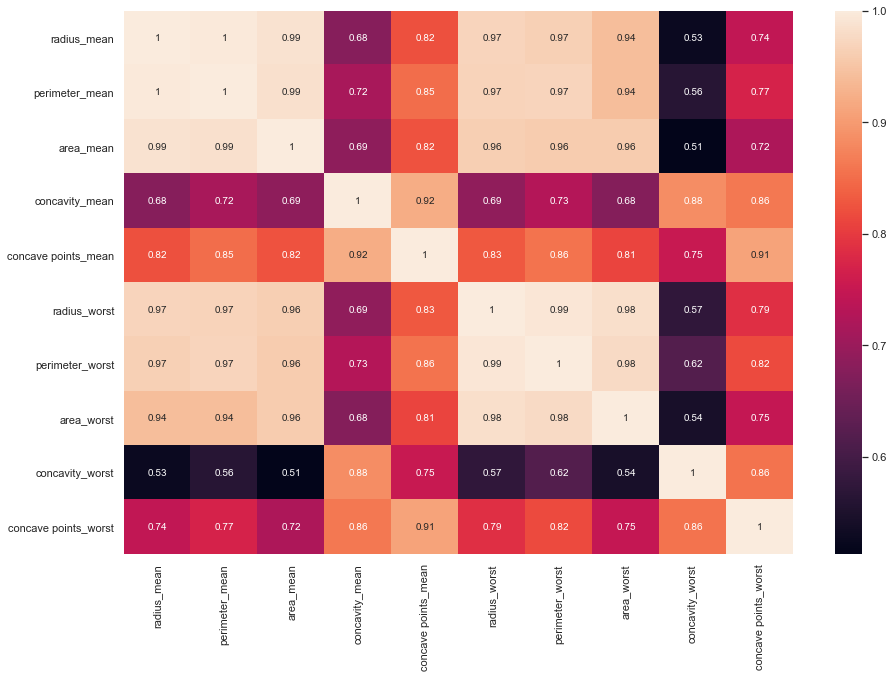

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(wdf.corr(), annot =True)

### So, we can observe that the selected features have huge collinearity among themselves. We should not use logistic regression as it effected by multicollinearity and outliers

## Multi variate Analysis

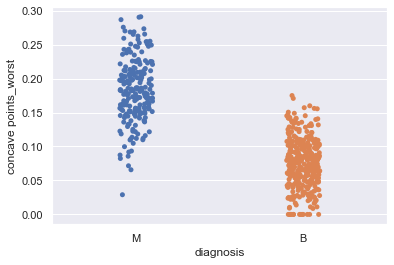

In [19]:
sns.stripplot(wdf['diagnosis'],wdf['concave points_worst'])

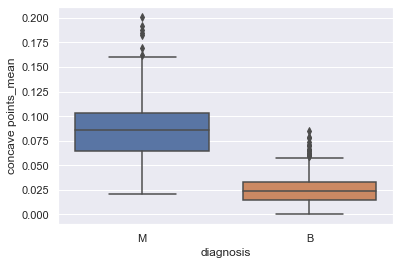

In [20]:
sns.boxplot(wdf['diagnosis'],wdf['concave points_mean'])

## To check whether we have outliers in the dataset

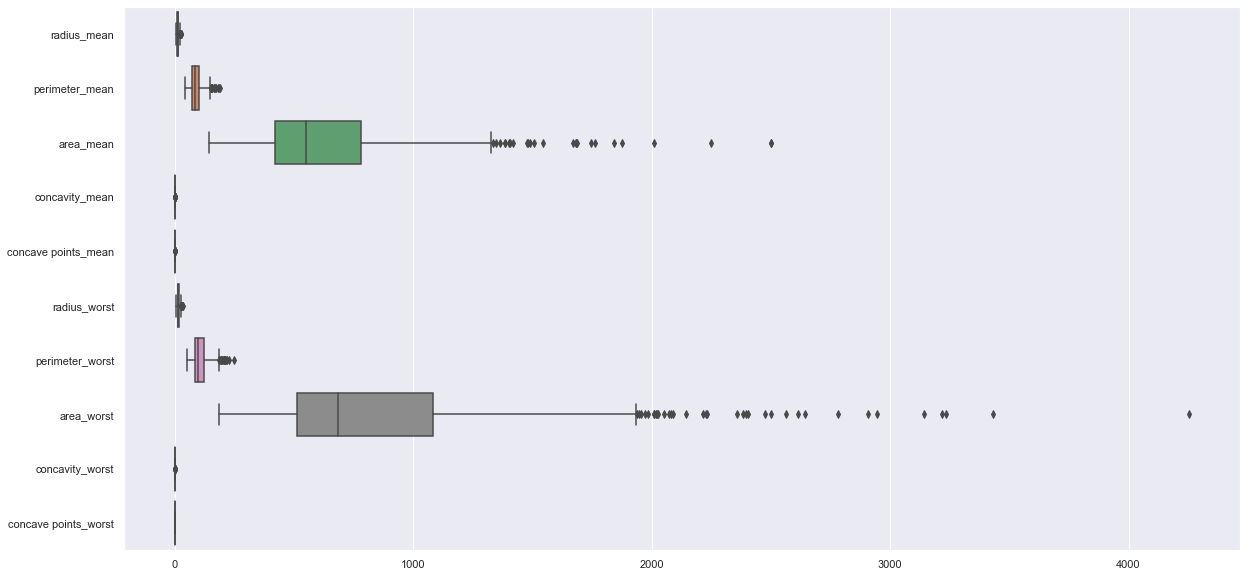

In [21]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = wdf.iloc[:,:-1], orient = 'h', ax =ax)

In [22]:
wdf.columns[:-1]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

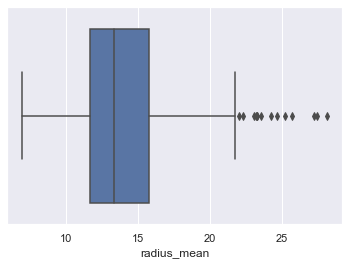

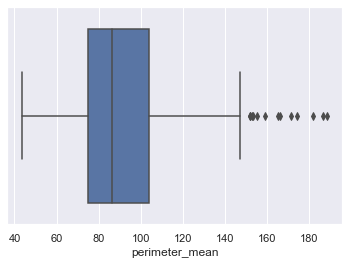

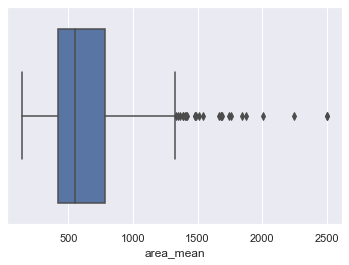

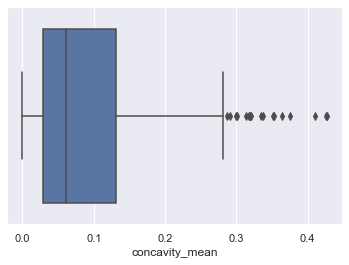

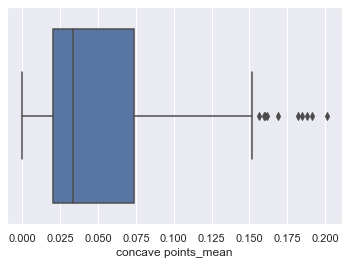

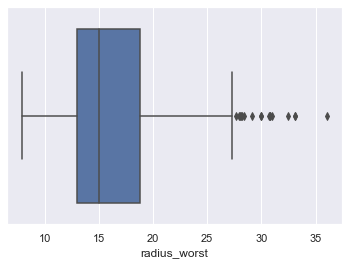

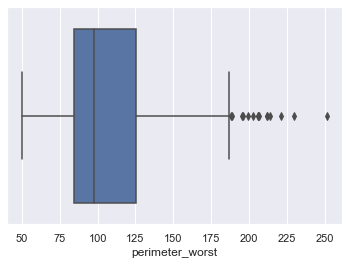

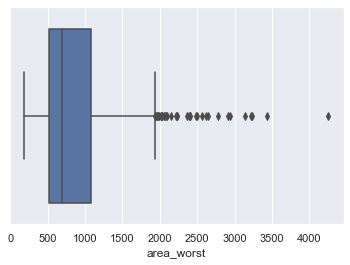

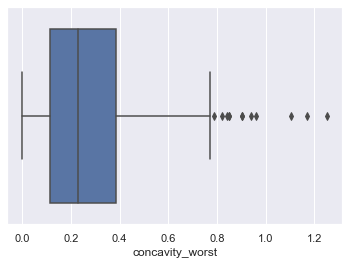

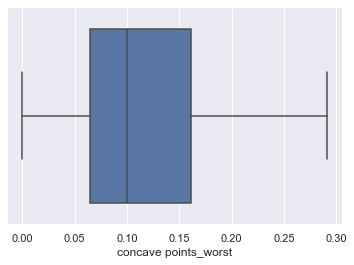

In [23]:
for col in wdf.columns[:-1]:
    sns.boxplot(x=wdf[col])
    plt.show()

# Modelling

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [25]:
mapping = {'B': 0, 'M': 1}
wdf['diagnosis']=wdf['diagnosis'].map(mapping)
wdf.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625,1


In [26]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score
X = wdf.iloc[:,:-1]
Y = wdf['diagnosis']
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.2, random_state = 0 , stratify = Y)
result_table = pd.DataFrame(columns = ['classifiers',
                                      'fpr', 'tpr', 'auc'])

In [27]:
dr = DecisionTreeClassifier()
dr.fit(x_tr, y_tr)
yp = dr.predict(x_te)
print(classification_report(y_te, yp))
yproba = dr.predict_proba(x_te)[::,1]
fpr, tpr, _ = roc_curve(y_te, yproba)
auc = roc_auc_score(y_te, yproba)
result_table = result_table.append({'classifiers': dr.__class__.__name__,
                                   'fpr': fpr,
                                   'tpr': tpr,
                                   'auc': auc}, ignore_index = True)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [28]:
xg = XGBClassifier()
xg.fit(x_tr, y_tr)
yp3 = xg.predict(x_te)
print(classification_report(y_te, yp3))
yproba3 = xg.predict_proba(x_te)[::,1]
fpr3, tpr3, _ = roc_curve(y_te, yproba3)
auc3 = roc_auc_score(y_te, yproba3)
result_table = result_table.append({'classifiers': xg.__class__.__name__,
                                   'fpr': fpr3,
                                   'tpr': tpr3,
                                   'auc': auc3}, ignore_index = True)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [29]:
r = RandomForestClassifier()
r.fit(x_tr, y_tr)
yp4 = r.predict(x_te)
print(classification_report(y_te, yp4))
yproba4 = r.predict_proba(x_te)[::,1]
fpr4, tpr4, _ = roc_curve(y_te, yproba4)
auc4 = roc_auc_score(y_te, yproba4)
result_table = result_table.append({'classifiers': r.__class__.__name__,
                                   'fpr': fpr4,
                                   'tpr': tpr4,
                                   'auc': auc4}, ignore_index = True)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [30]:
result_table.set_index('classifiers', inplace = True)
result_table.head()

,fpr,tpr,auc
classifiers,,,
DecisionTreeClassifier,"[0.0, 0.06944444444444445, 1.0]","[0.0, 0.9285714285714286, 1.0]",0.929563
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.023809523809523808, 0.0714285714285714...",0.971230
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01388888...","[0.0, 0.6428571428571429, 0.7380952380952381, ...",0.978671


### ROC Curve Analysis

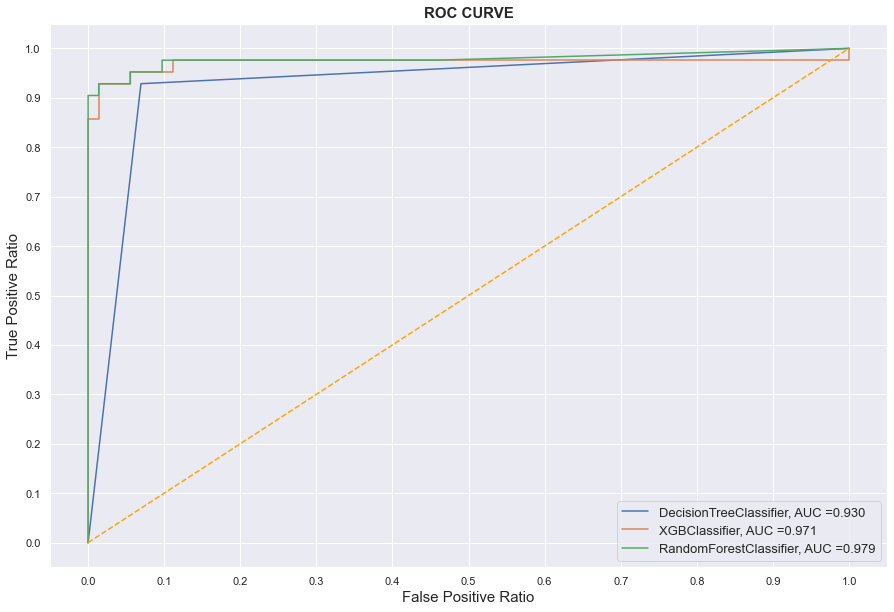

In [31]:
fig = plt.figure(figsize= (15,10))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
            result_table.loc[i]['tpr'],
            label = '{}, AUC ={:.3f}'.format(i, result_table.loc[i]['auc']))
plt.plot([0,1],[0,1], color = 'orange', linestyle ='--')
plt.xticks(np.arange(0.0,1.1, step = 0.1))
plt.xlabel('False Positive Ratio', fontsize = 15)
plt.yticks(np.arange(0.0,1.1, step = 0.1))
plt.ylabel('True Positive Ratio', fontsize = 15)
    
plt.title('ROC CURVE', fontweight = 'bold', fontsize = 15)
plt.legend(prop={'size':13}, loc = 'lower right')
plt.show()